# PRISM Workshop: Python for R Users.

## 0: Why use Python?

Python is a very powerful language with a large and active developer community (last year, [Python overtook Java as the 2nd most popular language on GitHub](https://octoverse.github.com/#build)), a very elegant and logical syntax, and a number of popular third-party packages for data analysis. The Python philosophy is that the language should provide *one* way to perform a task, and that one way should make sense. This goal is what the community that maintains and updates the Python language strives for, and it really shows (in my opinion).

But Python also offers flexibility: unlike Java, which tries to force you to adopt an object-oriented approach to everything you do, Python gives you choice. Your programs don't have to be [noun-dominated](https://steve-yegge.blogspot.com/2006/03/execution-in-kingdom-of-nouns.html)!

### 0.1. Installing and running python

If you use a Mac, good news: it comes with Python 2! You can start a Python session by opening the Terminal, typing "python", and pressing return. I *strongly* recommend installing Python again, though, because the default Python 2 installation doesn't allow you to update packages.

Installers of Python for both Mac and Windows can be found [here](https://www.python.org/downloads/release/python-2715/). 


### 0.2. Whitespace

R allows you to write a monstrosity like this:

```r
for(i in 1:5){x[i]<-i^2}
```

However, indentation is part of Python's syntax -- it's *interpreted*. The *body* of loops and function definitions have to be *indented* by two tabs or four spaces. This is part of the language's philosophy: simple is better than complex; readability counts. Using whitespace is better than counting parentheses and brackets at the ends of lines.

## 1: What's our goal today?

I am assuming that you have at least a working knowledge of R. In the coming 90 minutes, I cannot teach you the entire language, but I hope I can show you how Python differs from R, both syntactically and logically, so that you can translate your knowledge of one language to another painlessly.

I hope that, after leaving this workshop and maybe re-reading this script a couple times, you will be able to teach yourself anything you need to know in Python by:

a) leveraging your knowledge of R;

b) tinkering, the most important skill in programming;

c) reading the manuals and documentation for Python modules;

d) confidently working your way through self-teaching manuals, like the excellent Learn Python The Hard Way by Zed Shaw.

## 2. Python data structures

### 2.0 Lists and list comprehension

Lists in Python are analogous to vectors in R. Creating a list in Python looks almost the same as in R, but with square brackets instead of c():

In [2]:
mylist = [1, 4, 9, 16]
mylist

[1, 4, 9, 16]

Lists, like every other object type in Python, are zero-indexed. So:

In [3]:
mylist[0]

1

We can find the length of list with `len(mylist)`:

In [4]:
len(mylist)

4

But, of course, `mylist[len(mylist)]` won't work:

In [3]:
mylist[len(mylist)]

IndexError: list index out of range

Finding the last object of a list in Python can be done with `list[len(mylist)-1]`, or with this much more elegant solution:

In [6]:
mylist[-1]

16

Lists have a bunch of useful methods: append() adds an item to the end, insert() adds an item to the position of your choice, remove() removes an item you specify, etc. For example:

In [10]:
mylist.append(25)
mylist

[1, 4, 9, 16, 25]

In [11]:
mylist.insert(0, 36)
mylist

[36, 1, 4, 9, 16, 25]

In [12]:
mylist.sort()
mylist

[1, 4, 9, 16, 25, 36]

In [13]:
mylist.remove(36)
mylist

[1, 4, 9, 16, 25]

Python has *list comprehensions*, which is a way to create and manipulate lists. They work like loops, but much more concise. As an example (taken from the Python documentation), let's create a for loop to find squares: 

In [14]:
squares = []
for x in range(10):
    squares.append(x**2)

squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

Making this list with a loop is like issuing a command backwards: "for each number x in the range from 0 to 10, take the list called "squares" and append the square of x". List comprehensions make much more sense! Look:

In [15]:
squares = [x**2 for x in range(10)]
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

This is a much more direct command: "the list called 'squares' consists of x squared, for each number x in the range from 0 to 10".

List comprehensions can include `if` statements, too (in fact, list comprehensions can nest any number of `for` and `if` statements):

In [16]:
oddsquares = [x**2 for x in range(20) if x % 2 != 0]
oddsquares

[1, 9, 25, 49, 81, 121, 169, 225, 289, 361]

One difference between lists in Python and vectors in R is that Python arithmetic is not 'vectorized'. You cannot pass an operation to a vector like you can in R:

In [17]:
oddsquares % 3

TypeError: unsupported operand type(s) for %: 'list' and 'int'

This is where list comprehensions can come in handy:

In [18]:
[i % 3 for i in oddsquares]

[1, 0, 1, 1, 0, 1, 1, 0, 1, 1]

### 2.2 Dictionaries

Python has an object type called a dictionary that has no close cousin in R. Dictionaries are pairs of "keys" and "values" -- like words and definitions in a real dictionary. **Dictionaries are not ordered**. We can create a dictionary like this:

In [19]:
mydict = {'hello': 1, 'world': 3, 'foo': 9, 'bar': 27}
mydict

{'hello': 1, 'world': 3, 'foo': 9, 'bar': 27}

As dictionaries are not ordered, you cannot retrieve an object from a dictionary with square brackets (like `mydict[0]`). There are two methods to help you with that, though:

In [20]:
mydict.keys()

dict_keys(['hello', 'world', 'foo', 'bar'])

In [21]:
mydict.values()

dict_values([1, 3, 9, 27])

`keys()` and `values()` output lists, so you can pass them to functions:

In [22]:
sorted(mydict.keys())

['bar', 'foo', 'hello', 'world']

You *can* use square brackets on dictionaries to retrieve a value if you know its key:

In [23]:
mydict['foo']

9

You can also use list comprehensions to build dictionaries, using curly brackets instead of square brackets:

In [24]:
{x: x**2 for x in range(10)}

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}

### 2.3 Loops

Unlike R, Python works very well with `for` and `while` loops. The syntax is simpler, too -- following Python's whitespace rules, you don't need curly brackets before or after the body of the loop. You don't need parentheses in the loop statement, either:

(**by the way**: how would you write the statement below as a list comprehension?)

In [26]:
for item in oddsquares:
    print(float(item) ** 1/3)

0.3333333333333333
3.0
8.333333333333334
16.333333333333332
27.0
40.333333333333336
56.333333333333336
75.0
96.33333333333333
120.33333333333333


One of the best things about looping over lists in Python is the enumerate() function, which allows you to loop over the *indices* of a list as well as its elements. Note, by the way, how you can put elements in strings dynamically with `%s`.

In [28]:
for idx, item in enumerate(oddsquares):
    print("Element #%s is %s" % (idx, item))

Element #0 is 1
Element #1 is 9
Element #2 is 25
Element #3 is 49
Element #4 is 81
Element #5 is 121
Element #6 is 169
Element #7 is 225
Element #8 is 289
Element #9 is 361


The `%s % (string)` syntax is is supported in Python 2 and 3; Python 3 has two new ways to format strings dynamically. The first is `format()`:

In [32]:
print("Fun fact: {} are my favorite type of {}.".format("cats", "dog"))

Fun fact: cats are my favorite type of dog.
Fun fact: cats are my favorite type of dog.


`format()` supports optional on-the-fly variable-like naming:

In [33]:
print("Fun fact: {a} are my favorite type of {b}.".format(a = "cats", b = "dog"))

Fun fact: cats are my favorite type of dog.


The second is the f-String, which is new to Python 3.6. It supports inserting existing variables into strings, as long as you specify that your string is an f-String with `f"blabla"`:

In [40]:
a = "cats"
b = oddsquares[-1] ** 3
print(f"I want to own {b} {a}.")

I want to own 47045881 cats.


### 2.3 Functions

Function definitions (aka, 'writing' a function) and function calls look similar in Python as they do in R. Defining a function in Python starts with the term "def", then the name of the function, and its arguments (if any).

For example, let's use what we've learned so far to create a simple function that takes one argument (n) and then finds all the prime numbers between 1 and n.

In [42]:
def prime_finder(n):
    integers = range(2, n+1)
    compounds = []
    for idx, item in enumerate(integers):
        for divisor in integers[0:idx]:
            if item % divisor == 0:
                compounds.append(item)
                break
    primes = [number for number in integers if number not in compounds]
    print(primes)

prime_finder(15)

[2, 3, 5, 7, 11, 13]


The function works like this:

1. after `def`ining the function prime_finder, we create two objects: first, integers is a list of integers from 2 to n+1 (which is necessary because of how `range` works -- `range(a, b)` goes from a to b-1; if we want our list to go from 2 to 15, it has to be `2, n+1`). Second, compounds is an empty list that we use later to store numbers that we prove not to be prime.
2. we create one `for` loop, iterating through the indices and items in integers.
3. we create another for loop, this time with the items in integers up to idx - 1 -- that is, every integer *smaller* than the one we're currently at in the outer loop.
4. for each item-divisor pair, we obtain the remainder of the division of the larger by the smaller. *if* any division has remainder zero, we store the larger number in the "compounds" list.
5. *if* a division has remainder zero, we also `break` out of the loops, because we don't need to test that integer any further.
6. the list `primes` is created with a list comprehension -- it's made up of the `number`s in integers that are not in `compounds`.

There is a simpler way to do that, of course, using a `lambda` function and a dict comprehension. We won't have time to go through everything here so I propose two exercises for later: the easy one is to read the function carefully, look up everything you don't understand, and make sure that you can explain to yourself how the function works. The *extremely* easy one is to make my dumb code shorter, more readable, or both.

In [45]:
def prime_finder(n):
    integers = range(2, n+1)
    divides = {}
    zero_remainders = lambda x, y: [x % i == 0 for i in y]
    for i in range(len(integers)-1):
        divides[i+2] = zero_remainders(integers[i], [x for x in integers if x < integers[i]])
    return {k for k, v in divides.items() if sum(v) == 0}

prime_finder(15)

{2, 3, 5, 7, 11, 13}

## 3: Object-oriented programming (OOP)

Understanding the logic behind OOP is fundamental to learning Python. Briefly, object-oriented programming is a way to write programs that focuses on creating and manipulating objects, mainly by creating *classes* that your objects will belong to. Every object belongs to a class; each class comes with a set of functions and data that your objects *inherit* (terms in italics are important Python lingo, by the way) when you create them. For example, let's create a class called 'dog':

In [47]:
class Dog(object):
    # "def" is how you define a function. 
    # this one is called __init__; it's a special function that tells the language
    # how an object from this class will be initialized (that is, what inputs it takes
    # and what attributes it will have).
    def __init__(self, age):
        self.age = age
        self.humanage = age * 7
    def speech(self):
        print("Bork bork!")

The class Dog takes one input, which we call "age". You can tell how many inputs a class has by looking at that "\_\_init\_\_" function.

The class gives two *attributes* to its objects: "age", equal to the "age" input, and "humanage", which equals the dog's age multiplied by 7. Objects of the class "dog" have one
*method* (a method is a function specific to a class), called "speech", which takes no arguments and always prints "Bork bork!" to the console. 

Let's create an object of class Dog:

In [48]:
Riley = Dog(6)

Now, we can access Riley's *attributes*:

In [49]:
Riley.age

6

In [50]:
Riley.humanage

42

...and we can run this object's function, to access what Riley has to say: 

In [51]:
Riley.speech()

Bork bork!


This is different from the classes you've seen in R, which mostly refer to different kinds of data (numbers, alphanumerics, logicals, matrices, etc). In Python, a class is more like a container for attributes and functions.

The "object.attribute" or "object.function()" syntax appears everywhere in Python, and this is what it refers to -- in our example, Riley *is a* Dog, and so he *has an* age, a human age, and speech(). Any other object that is a Dog will have these same things (and you have to initialize them the same way -- by providing an age).

At its core, this is all that OOP really is. You write a program by creating classes, and creating objects and functions that "belong" to those classes. Objects are *instances* of classes, and they inherit all the properties of that class.

## 4. Packages and Modules

A note on nomenclature: a "module" is a `.py` file with a collection of functions, classes, and attributes. A module is analogous to an R package -- when you import one, you can access all its functions and objects. A "package" is a directory that contains one or more modules. Usually, even when you want to install a single module, it comes "packaged": the module will be installed in a folder, with the relevant `.py` file. In Pythonland, people usually talk about installing packages and importing modules, and this is why.

### 4.1 Installing packages

The best way to download and install packages in Python with `pip`, a command line utility which comes pre-installed with Python 3.

### 4.2 Loading modules

Once you've installed a package, you may import its modules to your scripts in two different ways: some packages only consist of one module, which you load with `import [module]`. Packages that have more than one module allow you to load individual modules with `from [package] import [module]`. You can also do that to load a specific class from a module: `from [module] import [class]`. 

There are a *ton* of useful Python packages, and there's no way I'll even scratch the surface, but here's a few of the most useful ones. 
#### `numpy`: the fundamental package for scientific computing

First, `numpy` has the *array* object type, which accepts "vectorized" operations like objects in R:

In [53]:
import numpy

ar = numpy.array([0, 1, 3, 5])
ray = numpy.array([7, 9, 11, 13])

ar * 2

array([ 0,  2,  6, 10])

In [54]:
ar * ray

array([ 0,  9, 33, 65])

Arrays can be used to create matrices. Note how, just like in R, `*` performs elementwise multiplication. You need the `dot()` function to multiply the two matrices:

In [55]:
array = numpy.array([[1,2], 
                     [3, 4]])
another_one = numpy.array([[5, 6], 
                           [7, 88]])

array * another_one

array([[  5,  12],
       [ 21, 352]])

In [56]:
another_one = numpy.array([[5, 6, 0], 
                           [7, 88, 9]])

array.dot(another_one)

array([[ 19, 182,  18],
       [ 43, 370,  36]])

In [57]:
# the "non-conformable arguments" error message in R is way more helpful than numpy's:
another_one.dot(array)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

`numpy` also has Python's best pseudo-random number generator. `random.randint(x, y, n)` draws `n` uniformly distributed random integers from x (inclusive) to y (exclusive). `n` can be used to specify the shape of the output array, if you want a matrix:

In [58]:
numpy.random.randint(5, 21, 10)

array([15,  5, 18, 12,  8, 20, 19, 14, 15,  5])

In [59]:
numpy.random.randint(5, 21, (2, 5))

array([[ 6, 17, 11, 16, 18],
       [ 6, 13,  7, 15, 19]])

There are a ton of distributions that you can sample from, as well. For example, here's `random.normal(mu, sigma, n)`:

In [60]:
numpy.random.normal(0, 2, 10)

array([-2.15429716,  0.80476371, -0.52153474,  2.51139098, -0.66253537,
        0.48362096, -1.32971468, -1.97166955,  0.16063069, -0.81360953])

#### `pandas`: data structures and functions for statistical analysis

Many data structures and functions in `pandas` resemble R functionality -- so much so, in fact, that the `pandas` manual has a "phrasebook" to help you translate common R tasks to Python code: https://pandas.pydata.org/pandas-docs/stable/comparison_with_r.html

For now, we'll look at pandas's two object types. The first is the `Series`, which sorta works like a dictionary: it's a one-dimensional object with values and labels. In fact, you can use a dictionary to create a series:

In [61]:
import pandas

#Series (data = data, index = labels)
s1 = pandas.Series(data = mydict)
s1

hello     1
world     3
foo       9
bar      27
dtype: int64

You can also create a series from a one-dimensional numpy array. Note that the labels are, by default, a list of element indices:

In [62]:
s2 = pandas.Series(data = numpy.random.normal(0, 2, 10))
s2

0   -1.948039
1    0.331331
2    0.212856
3    1.099777
4   -1.738501
5    0.412588
6    1.511896
7    2.446569
8   -3.129635
9   -0.125960
dtype: float64

There's also the `DataFrame`, quite powerful and very similar to data frames in R. You can create them from a dictionary of `Series`, a dictionary of numpy arrays, and a bunch of other ways. Let's create one starting from a dictionary of numpy arrays. Note how the keys in this dictionary end up as the variable labels:

In [63]:
raw_data = {"a": numpy.random.poisson(4, 10),
           "b": numpy.random.binomial(10, 0.33, 10)}

df = pandas.DataFrame(raw_data)
df

,a,b
0,5,3
1,2,4
2,6,1
3,6,3
4,5,2
5,8,5
6,4,6
7,7,3
8,2,3
9,4,2


You can change the indices and the variable labels of df:

In [64]:
df.index = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]
df.columns = ["var1", "var2"]
df

,var1,var2
a,5,3
b,2,4
c,6,1
d,6,3
e,5,2
f,8,5
g,4,6
h,7,3
i,2,3
j,4,2


You can treat a `DataFrame` like you would a dict, by referencing its key (note the similarity between `df['var1']` and R's `df$var1`). You can also treat columns as object attributes (i.e., the code below is equivalent to `df.var1`).

In [65]:
df['var1']

a    5
b    2
c    6
d    6
e    5
f    8
g    4
h    7
i    2
j    4
Name: var1, dtype: int64

Creating variables follows the same logic as in R's data.frame: refer to a column that doesn't exist and assign something to it.

In [66]:
df['var3'] = df['var2'] >= df['var1']
df

,var1,var2,var3
a,5,3,False
b,2,4,True
c,6,1,False
d,6,3,False
e,5,2,False
f,8,5,False
g,4,6,True
h,7,3,False
i,2,3,True
j,4,2,False


`pandas` makes it quite simple to calculate summary statistics. A few examples: 

In [67]:
df.var1.sum()

49

In [68]:
df.var1.cumsum()

a     5
b     7
c    13
d    19
e    24
f    32
g    36
h    43
i    45
j    49
Name: var1, dtype: int64

In [69]:
df.describe()

,var1,var2
count,10.000000,10.00000
mean,4.900000,3.20000
std,1.969207,1.47573
min,2.000000,1.00000
25%,4.000000,2.25000
50%,5.000000,3.00000
75%,6.000000,3.75000
max,8.000000,6.00000


In [70]:
df.var1.quantile([0.1, 0.25, 0.5, 0.9])

0.10    2.0
0.25    4.0
0.50    5.0
0.90    7.1
Name: var1, dtype: float64

In [71]:
df.var1.corr(df.var2)

-0.030587870146982214

In [72]:
df.corr()

,var1,var2,var3
var1,1.000000,-0.030588,-0.782623
var2,-0.030588,1.000000,0.529958
var3,-0.782623,0.529958,1.000000


#### matplotlib: plotting data

We can use our `df` to demonstrate plotting. On the next line, note one of Python's *best* syntactic conveniences: `import [module_with_long_name] as [mod]`. We don't want to type `matplotlib.pyplot` every time we build a plot, so `import X as Y` allows us to replace that with `plt`.

Also, `%matplotlib inline` is a "magic function": it changes the argument of matplotlib to "inline", so the plots will appear in the document instead of opening in a new window.

(array([2., 0., 0., 2., 0., 2., 2., 0., 1., 1.]),
 array([2. , 2.6, 3.2, 3.8, 4.4, 5. , 5.6, 6.2, 6.8, 7.4, 8. ]),
 <a list of 10 Patch objects>)

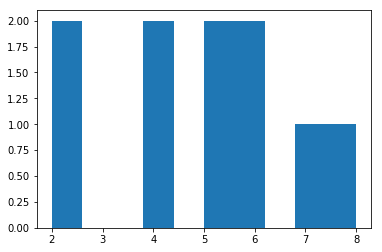

In [73]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.hist(df['var1'])

Two things to look for below:

1) we're changing the `%matplotlib inline` option to `%matplotlib notebook`. This ensures that our plots are interactive in the Jupyter notebook interface. However, we will need the `plt.figure()` function each time we build a plot, so that our plots are built separately, instead of all on top of one another on the same frame.

2) Arguments to matplotlib are extremely intuitive: for example, the `'bo'` option below makes a scatterplot with blue circles. `'r+'` makes red plus signs.

<IPython.core.display.Javascript object>


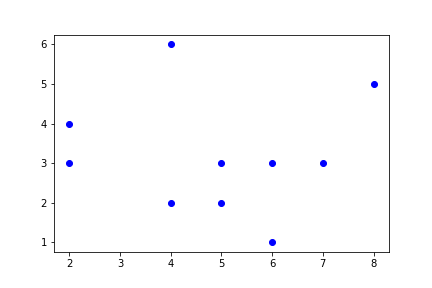

In [75]:
%matplotlib notebook

plt.plot(df['var1'], df['var2'], 'bo')

<IPython.core.display.Javascript object>


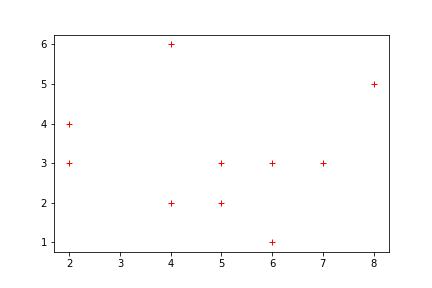

In [76]:
plt.figure()
plt.plot(df['var1'], df['var2'], 'r+')

Let's create a `DataFrame` with more observations, with a variable `b` that is a linear function of another, `a`, and a variable `c` that is a linear function of both.

In [77]:
df2 = pandas.DataFrame({"a": numpy.random.normal(2, 2, 1000)})
df2['b'] = 0.75 + 1.15*df2['a'] + numpy.random.normal(0, 1, 1000)
df2['c'] = 1 + 0.98*df2['a'] + (-1)*df2['b'] + numpy.random.normal(0, 1, 1000)
df2.head()

,a,b,c
0,-3.033653,-2.082192,-1.619064
1,2.937966,2.174604,1.690951
2,1.306485,2.423977,-1.153365
3,2.157793,2.817422,-0.523114
4,3.518712,5.226860,-2.546987


Here's a density plot of `a`; the `color` argument takes a handful of named colors, any hexadecimal color, and RGB (with colors between 0 and 1 rather than the more usual 0-255). Also note how we can modify the arguments of the plot in separate lines of code, just like plots in base R.

<IPython.core.display.Javascript object>


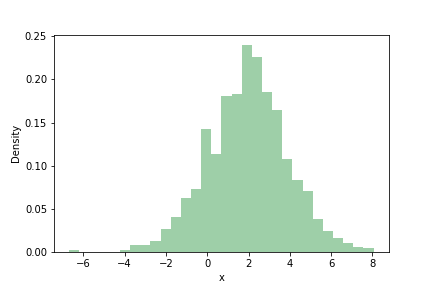

Text(0,0.5,'Density')

In [78]:
plt.figure()
plt.hist(df2['a'], bins = 30, color=(0.62, 0.81, 0.66), density = True)
plt.xlabel('x')
plt.ylabel('Density')

We can use the `scatter` function to explicitly build a scatterplot (that is, without depending on `plot()` to figure out what we want). This is advantageous because the function has more arguments than the default `plot`:

<IPython.core.display.Javascript object>


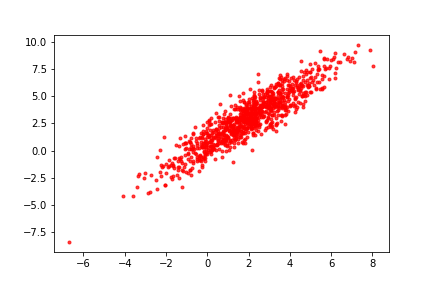

In [79]:
plt.figure()
plt.scatter(df2['a'], df2['b'], c="red", marker = ".", alpha = 0.75)

Below, I create a simple 3D scatterplot, using the dataframe from before. For 3d plots, you can use `Axes3D` from `matplotlib`'s `mpl_toolkits`.

Note that, before building the scatterplot, I create an object, `ax`, that takes a "figure" function (from `matplotlib.pyplot`) and adds a 3d projection to it. This "initializes" the figure as a 3D space, but without any data or geometric shape. The `scatter()` function, then, is passed to `ax` -- an object of class `matplotlib.axes` -- and not called on its own (i.e., as `plt.scatter()`).

<IPython.core.display.Javascript object>


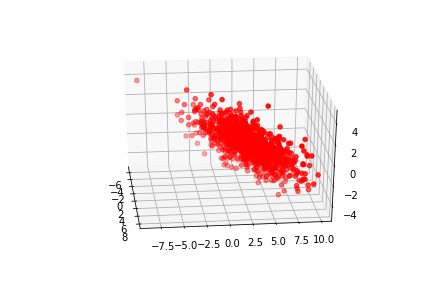

In [80]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().gca(projection="3d")
ax.scatter(df2['a'], df2['b'], df2['c'], color = "red")